In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
Data=pd.read_csv("../input/heart-failure-prediction/heart.csv")

In [3]:
Data.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
Data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
Data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Encoder Data

In [6]:
from sklearn.preprocessing import LabelEncoder
Data['Sex']=LabelEncoder().fit_transform(Data['Sex'])
Data['ChestPainType']=LabelEncoder().fit_transform(Data['ChestPainType'])
Data['RestingECG']=LabelEncoder().fit_transform(Data['RestingECG'])
Data['ExerciseAngina']=LabelEncoder().fit_transform(Data['ExerciseAngina'])
Data['ST_Slope']=LabelEncoder().fit_transform(Data['ST_Slope'])


In [7]:
Data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


# Visualization Data

<AxesSubplot:>

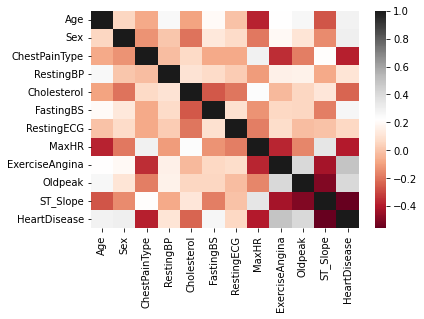

In [8]:
sns.heatmap(Data.corr(),cmap = 'RdGy')

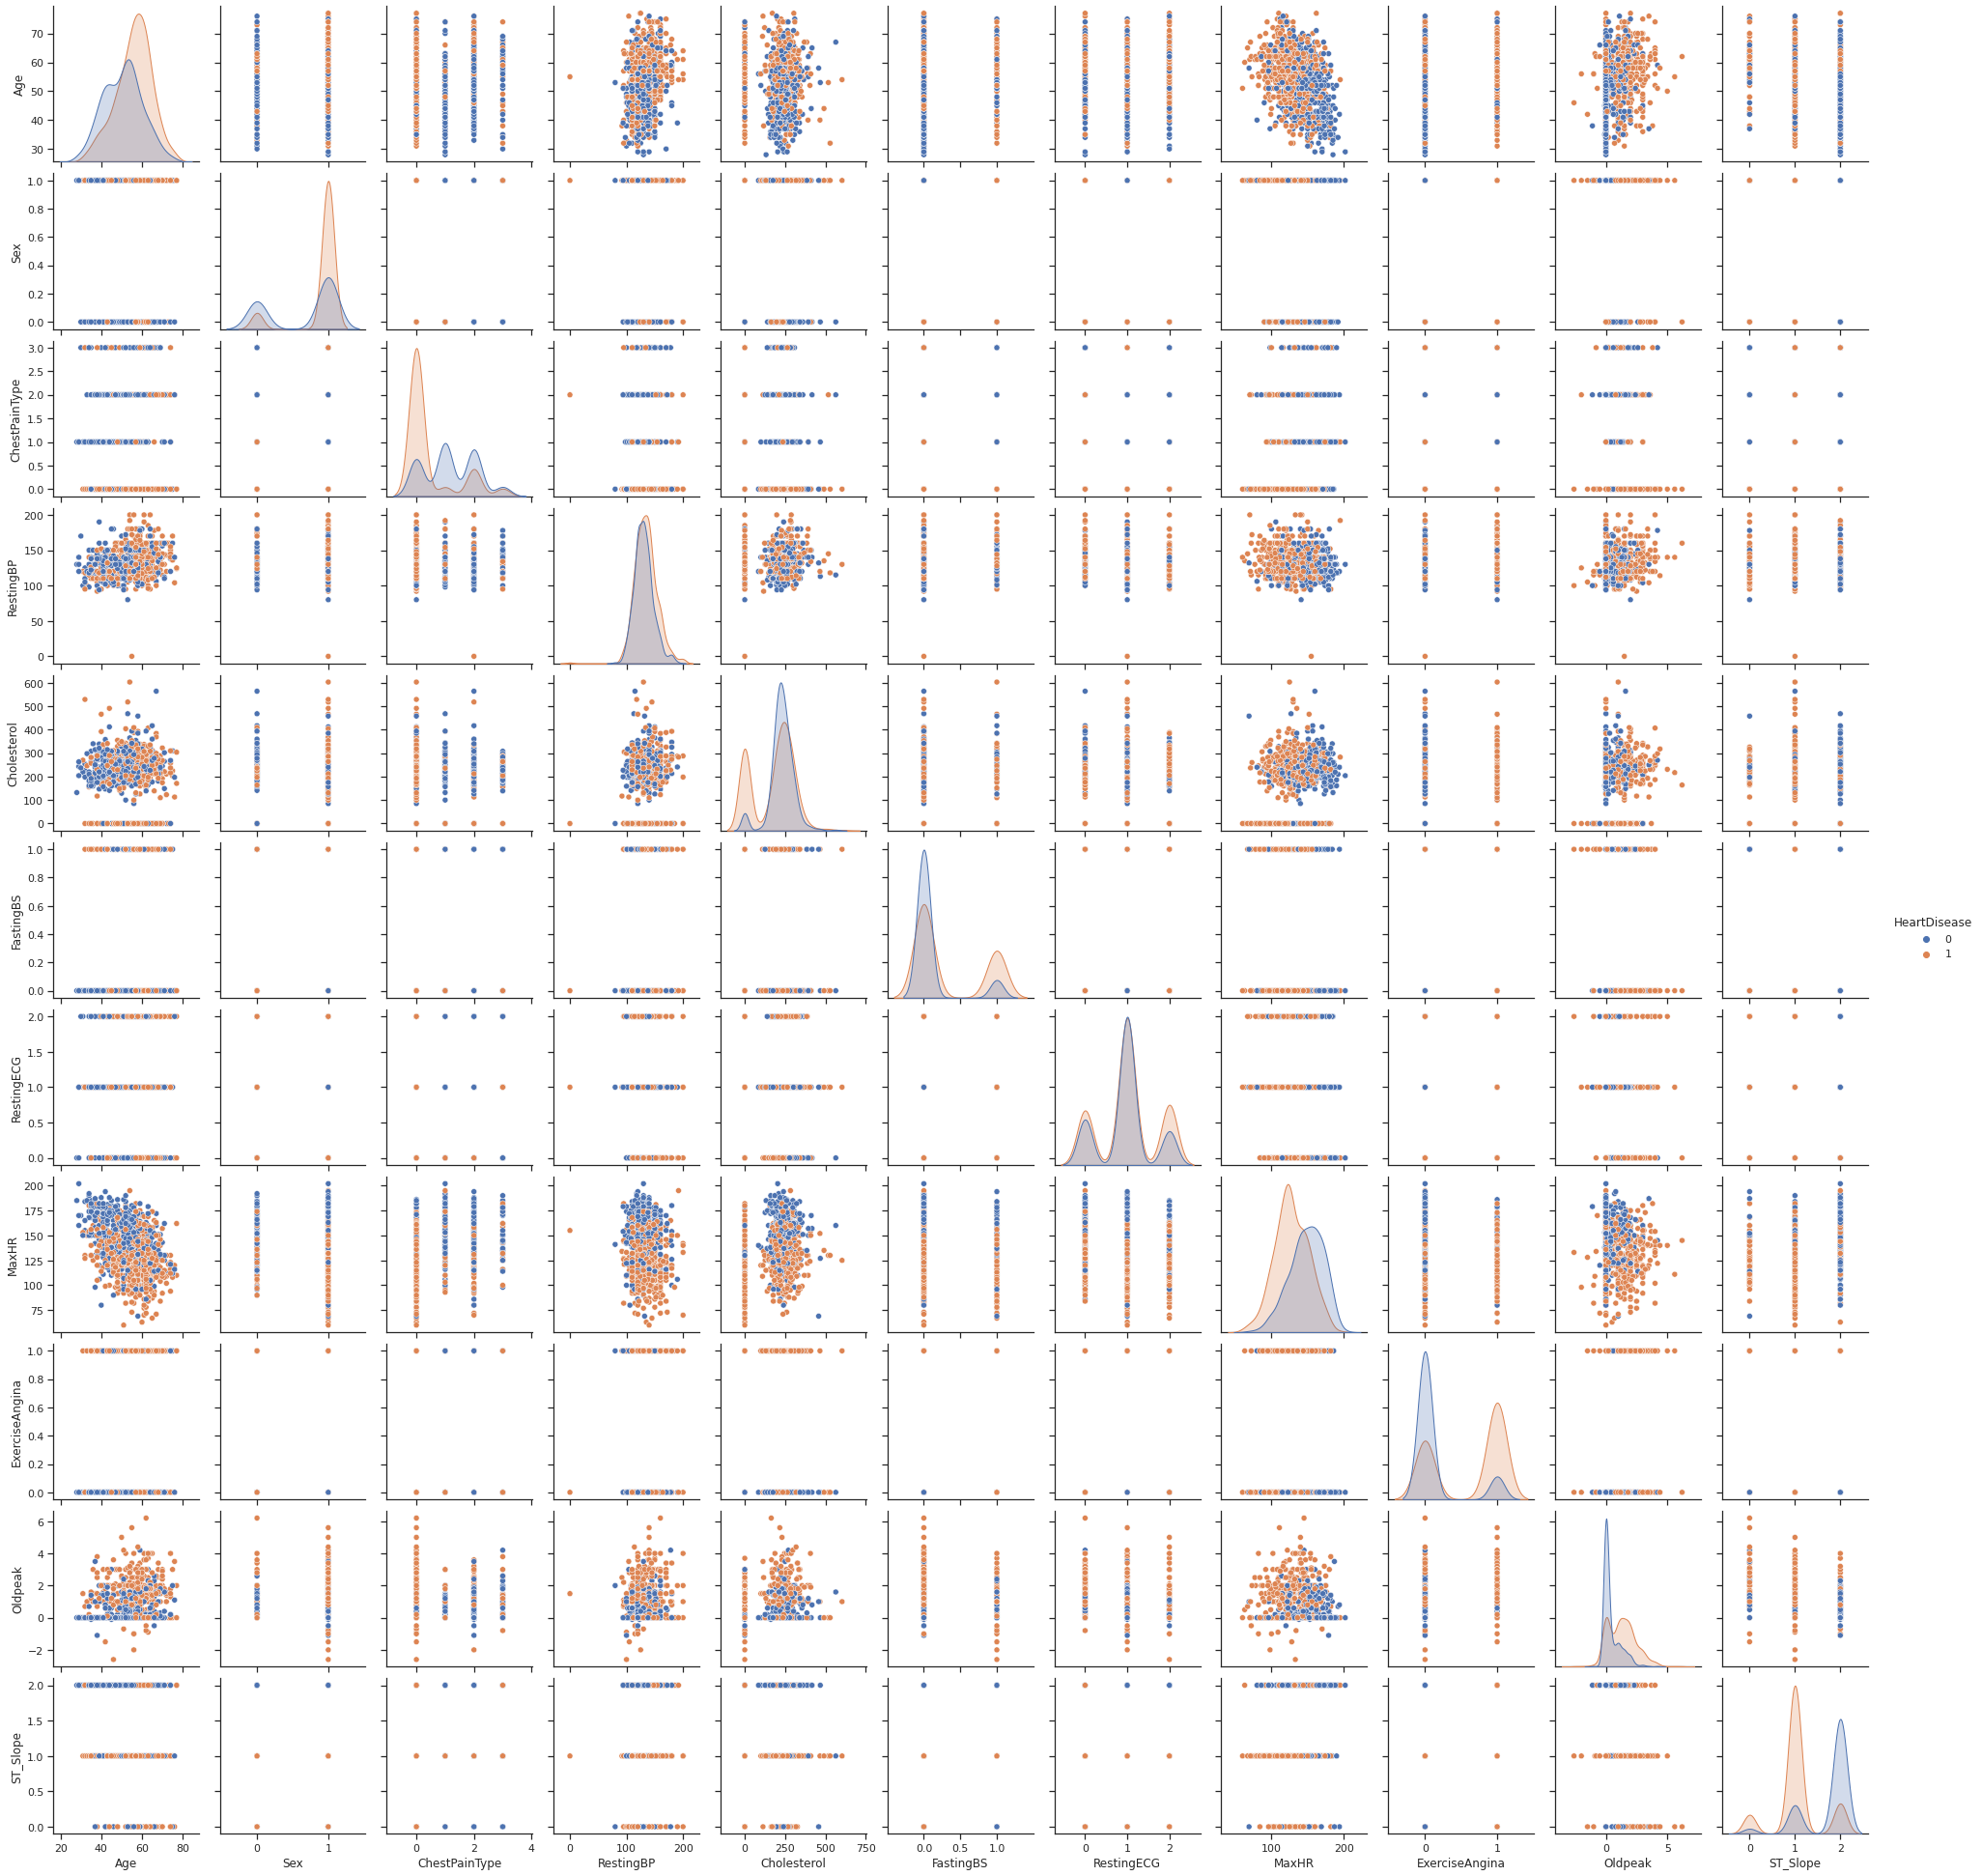

In [9]:
sns.set_theme(style="ticks")
sns.pairplot(Data,hue='HeartDisease')

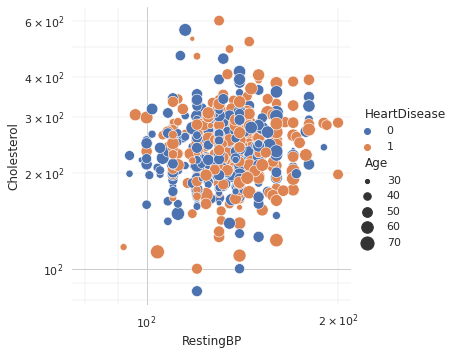

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(data=Data,x="RestingBP", y="Cholesterol",
    hue="HeartDisease", size="Age", sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

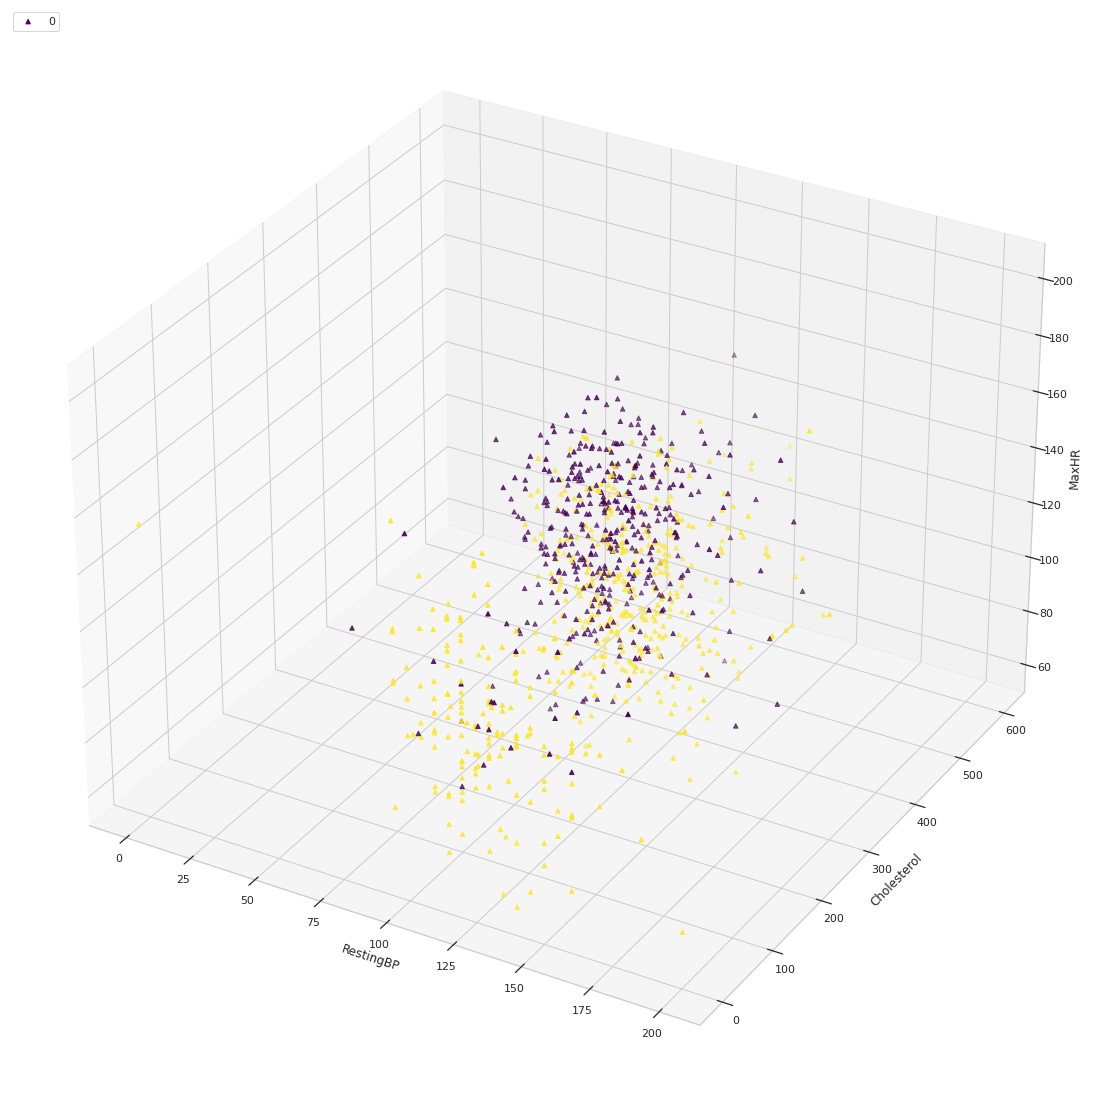

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d')

x = Data['RestingBP']
y = Data['Cholesterol']
z = Data['MaxHR']

ax.set_xlabel('RestingBP')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('MaxHR')
ax.scatter(x, y, z,c=Data['HeartDisease'],cmap='viridis',marker='^')
plt.legend([0,1] ,loc=2)

plt.show()

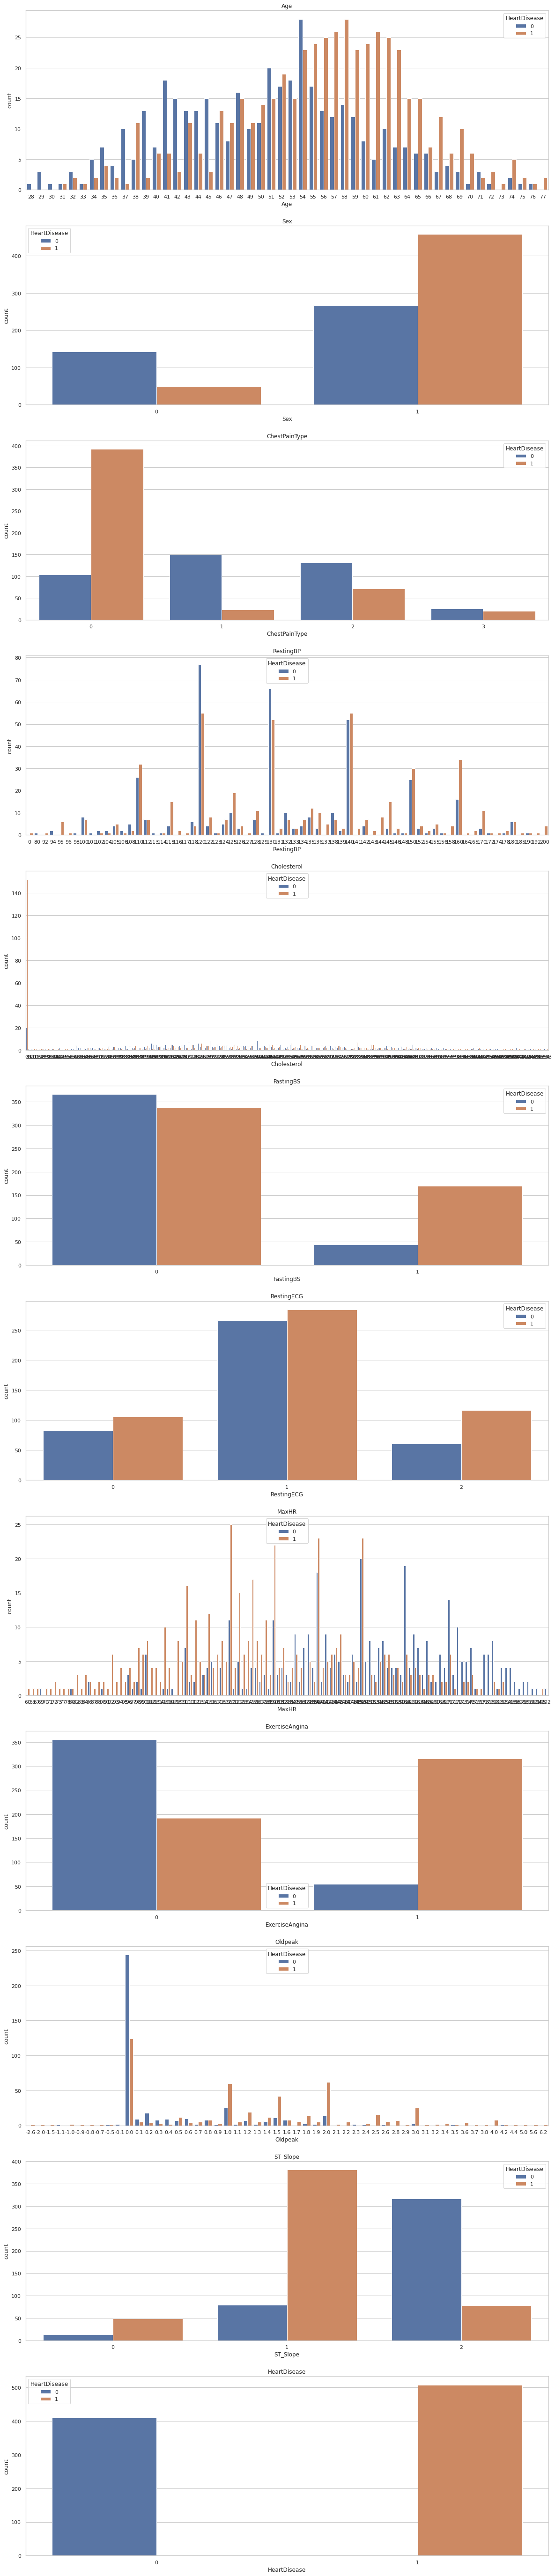

In [12]:
fig, ax =plt.subplots(12,1,figsize=(20,100))
x=0
for i in range(0,12):
    sns.countplot(x=Data.columns[x],data=Data,hue='HeartDisease',ax=ax[i]);
    ax[i].set_title(Data.columns[x])
    fig.show()
    x+=1

In [13]:
X=np.array(Data.iloc[:,:11])
Y=np.array(Data.iloc[:,-1])

# Training Model

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

oob_score: 0.8664850136239782
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        72
           1       0.89      0.90      0.90       112

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



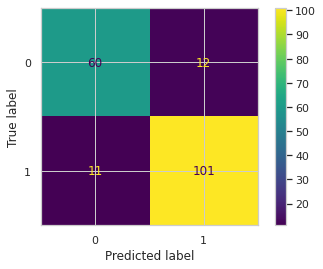

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,accuracy_score
clf_RF=RandomForestClassifier(max_depth=5,n_estimators=2000,oob_score=True)
clf_RF.fit(X_train,y_train)
print("oob_score:",clf_RF.oob_score_)
print (classification_report(y_test,clf_RF.predict(X_test)))
plot_confusion_matrix(clf_RF,X_test,y_test)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        72
           1       0.91      0.85      0.88       112

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.86      0.86       184



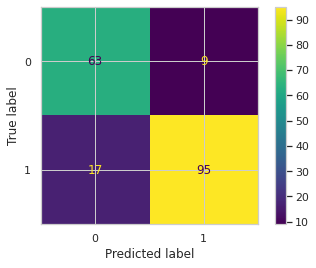

In [16]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(solver='liblinear',C=1)
LGR.fit(X_train,y_train)
print (classification_report(y_test,LGR.predict(X_test)))
plot_confusion_matrix(LGR,X_test,y_test)

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        72
           1       0.87      0.84      0.85       112

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



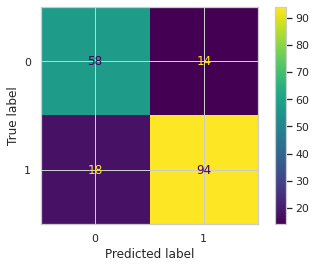

In [17]:
from sklearn.svm import SVC
clf_SVM=SVC(C=100,kernel='rbf')
clf_SVM.fit(X_train,y_train)
print (classification_report(y_test,clf_SVM.predict(X_test)))
plot_confusion_matrix(clf_SVM,X_test,y_test)

<BarContainer object of 3 artists>

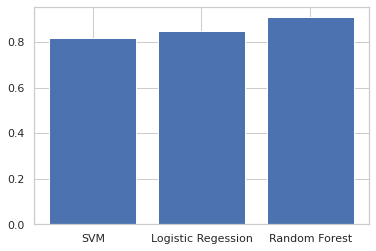

In [18]:
acc_SVM=accuracy_score(y_train,clf_SVM.predict(X_train))
acc_RF=accuracy_score(y_train,clf_RF.predict(X_train))
acc_LR=accuracy_score(y_train,LGR.predict(X_train))
acc=[acc_SVM,acc_LR,acc_RF]
model=['SVM','Logistic Regession','Random Forest']
plt.bar(model,acc)

# Plot Roc Curve

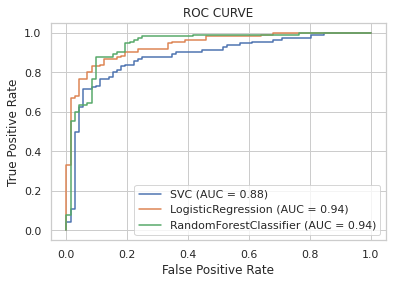

In [19]:
from sklearn.metrics import plot_roc_curve
fig=plot_roc_curve(clf_SVM,X_test,y_test)
fig=plot_roc_curve(LGR,X_test,y_test,ax=fig.ax_)
fig=plot_roc_curve(clf_RF,X_test,y_test,ax=fig.ax_)
plt.title("ROC CURVE")
plt.show()